In [1]:
#importing basic lib
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter('ignore')

In [2]:
#importing neccessary libs
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error

In [3]:
import matplotlib.pyplot as plt
import squarify

In [4]:
filename = 'color_survey_answers.csv'

In [5]:
colours = pd.DataFrame()

In [6]:
colours = pd.read_csv(filename , delimiter='\t')

In [7]:
colours.head()

,id,user_id,datestamp,r,g,b,colorname
0,1,1,1.267419e+09,72,100,175,pastel blue
1,2,1,1.267419e+09,204,177,246,faint violet
2,3,1,1.267419e+09,182,226,245,baby blue
3,4,1,1.267419e+09,130,64,234,purple
4,5,2,1.267419e+09,75,49,234,blue


In [8]:
colours.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3363127 entries, 0 to 3363126
Data columns (total 7 columns):
id           int64
user_id      int64
datestamp    float64
r            int64
g            int64
b            int64
colorname    object
dtypes: float64(1), int64(5), object(1)
memory usage: 179.6+ MB


In [9]:
#converting date as datetime
from datetime import datetime
colours['datestamp'] = pd.to_datetime(colours['datestamp'],unit='s')

In [10]:
#extracting new colours to dataframe
new_colour = pd.DataFrame()

In [11]:
new_colour = colours[colours['colorname'] == 'impatiens juice'].copy()

In [12]:
new_colour = colours[colours['colorname'] == 'caribbean surf'].append(new_colour)

In [13]:
new_colour = colours[colours['colorname'] == 'medium tan leather'].append(new_colour)

In [14]:
new_colour = colours[colours['colorname'] == 'babypoo'].append(new_colour)

In [15]:
#increasing th
new_colour = new_colour.append([new_colour]*10)

In [16]:
new_colour.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88 entries, 185291 to 3170468
Data columns (total 7 columns):
id           88 non-null int64
user_id      88 non-null int64
datestamp    88 non-null datetime64[ns]
r            88 non-null int64
g            88 non-null int64
b            88 non-null int64
colorname    88 non-null object
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 5.5+ KB


In [17]:
colours = colours.groupby('colorname').filter(lambda x: len(x) > 11)

In [18]:
colours = pd.concat([colours,new_colour],ignore_index=True)

In [19]:
colours['colorname'].value_counts()

green                       310064
blue                        284220
purple                      245832
pink                        129286
brown                        74782
red                          68985
light blue                   57381
teal                         56336
orange                       51449
light green                  49073
yellow                       43494
magenta                      43139
grey                         35664
sky blue                     34043
violet                       32407
lime green                   30918
light purple                 29221
turquoise                    25925
lavender                     25447
cyan                         24421
tan                          23710
dark green                   23624
dark blue                    23116
aqua                         23036
forest green                 19112
mauve                        18899
bright green                 18578
gray                         18003
olive               

In [20]:
colours = colours.sample(frac = 1,random_state= 10).reset_index(drop = True)

In [21]:
colours_small = colours.sample(100000,random_state= 10)

In [22]:
colours_small.head()

,id,user_id,datestamp,r,g,b,colorname
2883924,290597,14286,2010-03-02 02:52:29,252,83,53,orange
518997,2630753,118140,2010-03-22 15:11:27,207,80,247,purple
637323,2416320,108706,2010-03-19 09:59:58,197,139,217,mauve
1128570,3071184,136868,2010-03-29 09:40:18,130,91,197,purple
1924913,280867,13855,2010-03-02 02:14:36,64,170,51,green


In [23]:
colours_small['color_green'] = np.where(colours_small['colorname'].str.contains('gree'), 1, 0)

In [24]:
colours_small['color_red'] = np.where(colours_small['colorname'].str.contains('red'), 1, 0)

In [25]:
colours_small['color_blue'] = np.where(colours_small['colorname'].str.contains('blue'), 1, 0)

In [26]:
colours_small['color_yellow'] = np.where(colours_small['colorname'].str.contains('yellow'), 1, 0)

In [27]:
colours_small['color_purple'] = np.where(colours_small['colorname'].str.contains('purple'), 1, 0)

In [28]:
colours_small['color_tan'] = np.where(colours_small['colorname'].str.contains('tan'), 1, 0)

In [29]:
colours_small['color_gray'] = np.where(colours_small['colorname'].str.contains('gray'), 1, 0)

In [30]:
colours_small['color_pink'] = np.where(colours_small['colorname'].str.contains('pink'), 1, 0)

In [31]:
colours_small.head()

,id,user_id,datestamp,r,g,b,colorname,color_green,color_red,color_blue,color_yellow,color_purple,color_tan,color_gray,color_pink
2883924,290597,14286,2010-03-02 02:52:29,252,83,53,orange,0,0,0,0,0,0,0,0
518997,2630753,118140,2010-03-22 15:11:27,207,80,247,purple,0,0,0,0,1,0,0,0
637323,2416320,108706,2010-03-19 09:59:58,197,139,217,mauve,0,0,0,0,0,0,0,0
1128570,3071184,136868,2010-03-29 09:40:18,130,91,197,purple,0,0,0,0,1,0,0,0
1924913,280867,13855,2010-03-02 02:14:36,64,170,51,green,1,0,0,0,0,0,0,0


In [32]:
#x is the input features
train = np.array(colours_small.drop(['colorname','datestamp'],1))
#y is the target 
target = np.array(colours_small['colorname'])

In [33]:
train_data, test_data,train_target, test_target = train_test_split(train,target,test_size=0.33, random_state=0)

In [34]:
rf = RandomForestClassifier(max_features='auto', max_depth=4 , min_samples_leaf= 4, max_leaf_nodes= 8,n_estimators=1500,random_state=47)

In [35]:
pca_rf = Pipeline([('preprocessing', StandardScaler()),('pca', PCA(n_components= 'mle')), ('classifier', rf)])

In [36]:
pca_rf.fit(train_data,train_target)

Pipeline(memory=None,
     steps=[('preprocessing', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components='mle', random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('classifier', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='g...tors=1500, n_jobs=None,
            oob_score=False, random_state=47, verbose=0, warm_start=False))])

In [37]:
pred = pca_rf.predict(test_data)

In [38]:
score = pca_rf.score(test_data,test_target)*100
print("Accuracy: %f" % (score))

Accuracy: 40.621212


In [39]:
#!pip install squarify

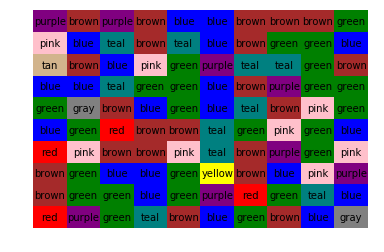

In [40]:
squarify.plot(sizes = [10]*100, label=pred[:100] ,color = pred[:100])
plt.axis('off')
plt.show()
